# **IMPORT DATA & DATA ANALYSIS**

In [2]:
import pandas as pd
dataset = pd.read_csv("/content/weatherAUS.csv")

In [3]:
dataset.shape

(142193, 24)

In [4]:
dataset.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  Pressure9am  \
0           W           44.0          W  ...        22.0       1007.7   
1         WNW           44.0        NNW  ...        25.0       1010.6   
2         WSW           46.0          W  ...        30.0       1007.6   
3          NE           24.0         SE  ...        16.0       1017.6   
4           W           41.0        ENE  ...        33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  \
0       1007.1       8.0       NaN     16.9     21.8         No      0.0   
1       1007.8       NaN       NaN     17.2     24.3         No      0.0   
2       1008.7       NaN       2.0     21.0     23.2         No      0.0   
3       1012.8       NaN       NaN     18.1     26.5         No      1.0   
4       1006.0       7.0       8.0     17.8     29.7         No      0.2   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 24 columns]

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [6]:
# Breaking the 'Date' column into 'year', 'month', and 'day' columns for easier analysis
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day
dataset.drop(['Date'], axis=1, inplace=True)
dataset.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Cloud9am  Cloud3pm  Temp9am  \
0           44.0          W        WNW  ...       8.0       NaN     16.9   
1           44.0        NNW        WSW  ...       NaN       NaN     17.2   
2           46.0          W        WSW  ...       NaN       2.0     21.0   
3           24.0         SE          E  ...       NaN       NaN     18.1   
4           41.0        ENE         NW  ...       7.0       8.0     17.8   

   Temp3pm  RainToday  RISK_MM  RainTomorrow  year  month  day  
0     21.8         No      0.0            No  2008     12    1  
1     24.3         No      0.0            No  2008     12    2  
2     23.2         No      0.0            No  2008     12    3  
3     26.5         No      1.0            No  2008     12    4  
4     29.7         No      0.2            No  2008     12    5  

[5 rows x 26 columns]

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [8]:
# Convert 'RainToday' and 'RainTomorrow' columns from categorical ('Yes'/'No') to binary numeric values (1 for Yes, 0 for No)
dataset['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)
dataset['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)
dataset.head()

/tmp/ipython-input-867806961.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)
/tmp/ipython-input-867806961.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)
/tmp/ipyth

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0   Albury     13.4     22.9       0.6          NaN       NaN           W   
1   Albury      7.4     25.1       0.0          NaN       NaN         WNW   
2   Albury     12.9     25.7       0.0          NaN       NaN         WSW   
3   Albury      9.2     28.0       0.0          NaN       NaN          NE   
4   Albury     17.5     32.3       1.0          NaN       NaN           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Cloud9am  Cloud3pm  Temp9am  \
0           44.0          W        WNW  ...       8.0       NaN     16.9   
1           44.0        NNW        WSW  ...       NaN       NaN     17.2   
2           46.0          W        WSW  ...       NaN       2.0     21.0   
3           24.0         SE          E  ...       NaN       NaN     18.1   
4           41.0        ENE         NW  ...       7.0       8.0     17.8   

   Temp3pm  RainToday  RISK_MM  RainTomorrow  year  month  day  
0     21.8        0.0      0.0             0  2008     12    1  
1     24.3        0.0      0.0             0  2008     12    2  
2     23.2        0.0      0.0             0  2008     12    3  
3     26.5        0.0      1.0             0  2008     12    4  
4     29.7        0.0      0.2             0  2008     12    5  

[5 rows x 26 columns]

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

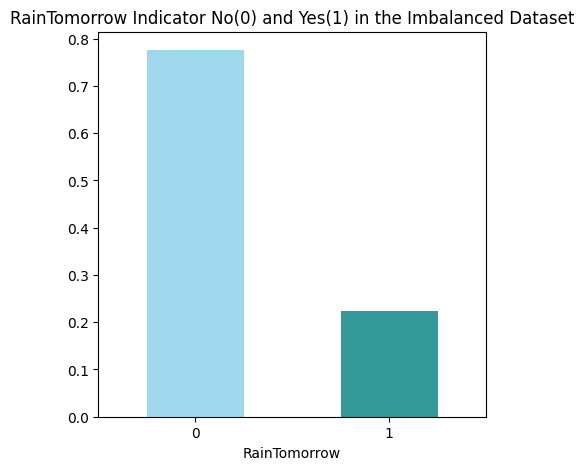

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))
dataset.RainTomorrow.value_counts(normalize=True).plot(kind='bar',color= ['skyblue','teal'] ,alpha= 0.8 ,rot=0)
plt.title("RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset")
plt.show()

# **HANDLE DATA IMBALANNCE**

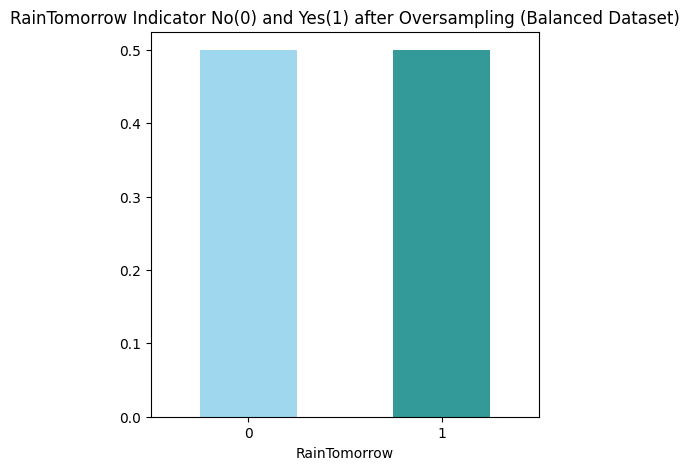

In [11]:
from sklearn.utils import resample

no = dataset[dataset.RainTomorrow == 0]
yes = dataset[dataset.RainTomorrow == 1]

yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=42)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize=(5, 5))
oversampled.RainTomorrow.value_counts(normalize=True).plot(kind='bar', color=['skyblue', 'teal'], alpha=0.8, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

<Axes: >

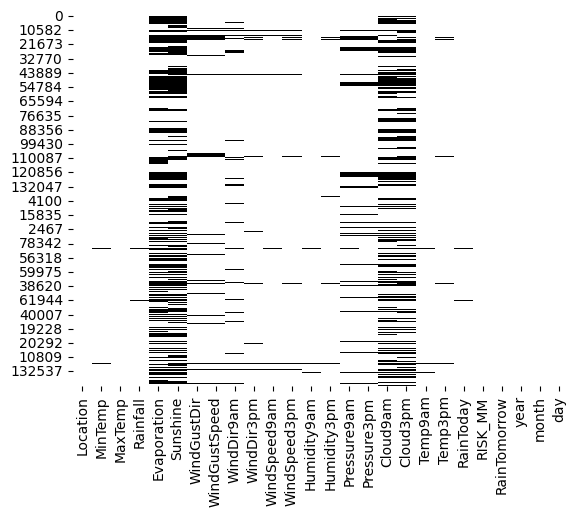

In [12]:
import seaborn as sns
sns.heatmap(oversampled.isnull(), cbar=False, cmap='binary')

In [13]:
# Calculate and display the total number and percentage of missing values for each column,
# sorted in descending order, and show the top 4 columns with the most missing data

total = oversampled.isnull().sum().sort_values(ascending=False)
percent = (oversampled.isnull().sum()/oversampled.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

Total   Percent
Sunshine     104711  0.474596
Evaporation   95325  0.432054
Cloud3pm      85658  0.388239
Cloud9am      81388  0.368886

# **IMPUTATION , OUTLIER DETECTION & REMOVAL**

In [14]:
oversampled.select_dtypes(include=['object']).columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [15]:
# Fill missing values in categorical columns ('Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm')
# with their respective mode (most frequent value) to ensure no NaN remains in these fields

oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [16]:
from sklearn.preprocessing import LabelEncoder
le = {}

for col in oversampled.select_dtypes(include=['object']).columns:
    le[col] = LabelEncoder()
    oversampled[col] = le[col].fit_transform(oversampled[col])

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

MiceImputed = oversampled.copy(deep=True)
mice_imputer = IterativeImputer()
MiceImputed.iloc[:,:] = mice_imputer.fit_transform(oversampled)

In [19]:
MiceImputed.head()

Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  WindGustDir  \
0         2     13.4     22.9       0.6     6.083728   7.574125           13   
1         2      7.4     25.1       0.0     5.976502  11.590325           14   
2         2     12.9     25.7       0.0     8.071945  12.385405           15   
3         2      9.2     28.0       0.0     6.298094  11.862159            4   
4         2     17.5     32.3       1.0     7.390434   6.157304           13   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Cloud9am  Cloud3pm  Temp9am  \
0           44.0          13          14  ...  8.000000  4.784585     16.9   
1           44.0           6          15  ...  1.886788  2.618932     17.2   
2           46.0          13          15  ...  1.970936  2.000000     21.0   
3           24.0           9           0  ...  1.371664  2.121637     18.1   
4           41.0           1           7  ...  7.000000  8.000000     17.8   

   Temp3pm  RainToday  RISK_MM  RainTomorrow  year  month  day  
0     21.8        0.0      0.0             0  2008     12    1  
1     24.3        0.0      0.0             0  2008     12    2  
2     23.2        0.0      0.0             0  2008     12    3  
3     26.5        0.0      1.0             0  2008     12    4  
4     29.7        0.0      0.2             0  2008     12    5  

[5 rows x 26 columns]

In [20]:
MiceImputed.isna()

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0         False    False    False     False        False     False   
1         False    False    False     False        False     False   
2         False    False    False     False        False     False   
3         False    False    False     False        False     False   
4         False    False    False     False        False     False   
...         ...      ...      ...       ...          ...       ...   
16163     False    False    False     False        False     False   
44739     False    False    False     False        False     False   
10169     False    False    False     False        False     False   
6662      False    False    False     False        False     False   
23751     False    False    False     False        False     False   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Cloud9am  \
0            False          False       False       False  ...     False   
1            False          False       False       False  ...     False   
2            False          False       False       False  ...     False   
3            False          False       False       False  ...     False   
4            False          False       False       False  ...     False   
...            ...            ...         ...         ...  ...       ...   
16163        False          False       False       False  ...     False   
44739        False          False       False       False  ...     False   
10169        False          False       False       False  ...     False   
6662         False          False       False       False  ...     False   
23751        False          False       False       False  ...     False   

       Cloud3pm  Temp9am  Temp3pm  RainToday  RISK_MM  RainTomorrow   year  \
0         False    False    False      False    False         False  False   
1         False    False    False      False    False         False  False   
2         False    False    False      False    False         False  False   
3         False    False    False      False    False         False  False   
4         False    False    False      False    False         False  False   
...         ...      ...      ...        ...      ...           ...    ...   
16163     False    False    False      False    False         False  False   
44739     False    False    False      False    False         False  False   
10169     False    False    False      False    False         False  False   
6662      False    False    False      False    False         False  False   
23751     False    False    False      False    False         False  False   

       month    day  
0      False  False  
1      False  False  
2      False  False  
3      False  False  
4      False  False  
...      ...    ...  
16163  False  False  
44739  False  False  
10169  False  False  
6662   False  False  
23751  False  False  

[220632 rows x 26 columns]

In [21]:
# detect outliers using IQR

Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Location         25.000000
MinTemp           9.200000
MaxTemp          10.200000
Rainfall          2.400000
Evaporation       4.117708
Sunshine          5.914120
WindGustDir       9.000000
WindGustSpeed    19.000000
WindDir9am        8.000000
WindDir3pm        8.000000
WindSpeed9am     13.000000
WindSpeed3pm     11.000000
Humidity9am      26.000000
Humidity3pm      30.000000
Pressure9am       8.700000
Pressure3pm       8.841193
Cloud9am          4.000000
Cloud3pm          3.692199
Temp9am           9.300000
Temp3pm           9.800000
RainToday         1.000000
RISK_MM           5.200000
RainTomorrow      1.000000
year              5.000000
month             5.000000
day              15.000000
dtype: float64


In [22]:
# Removing Outliers
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(156799, 26)

<Axes: >

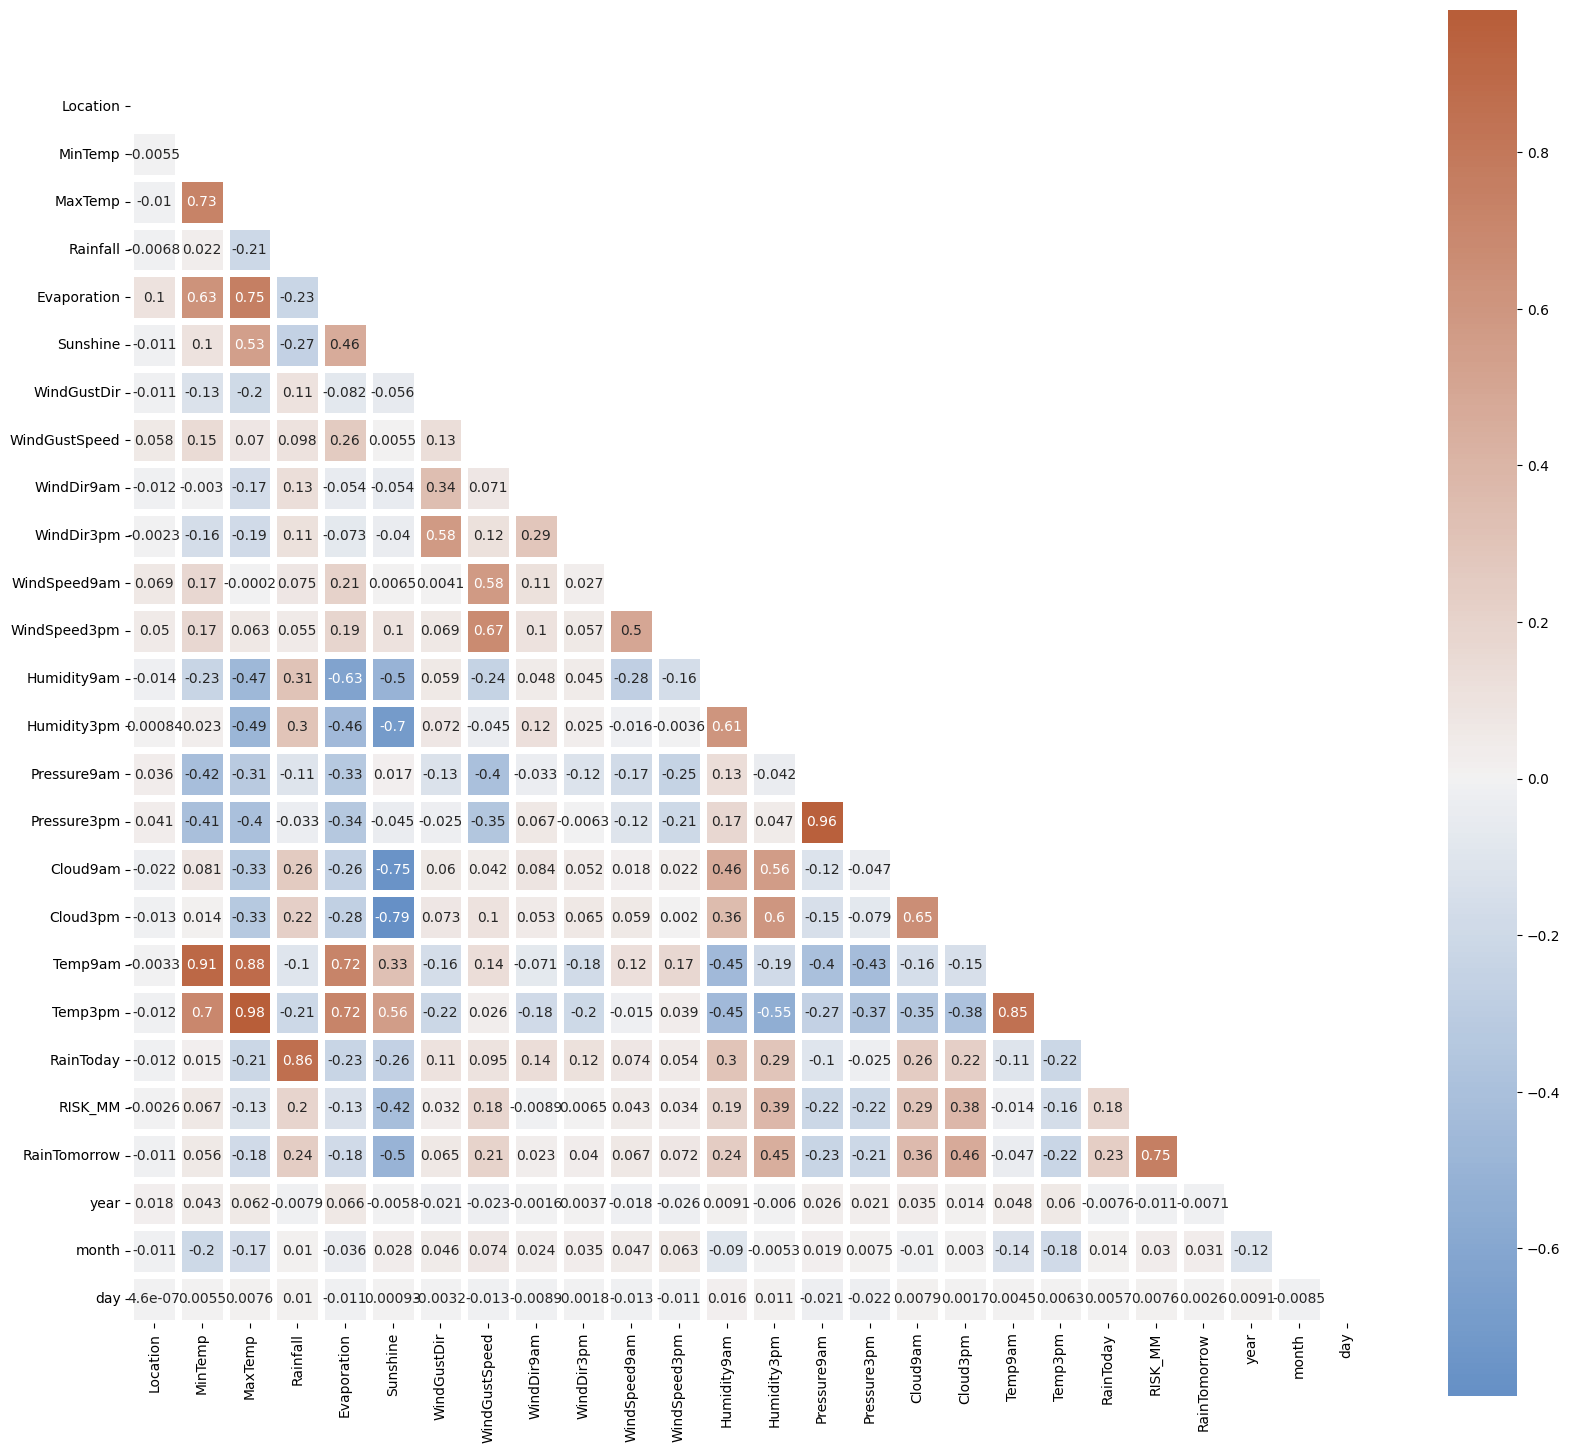

In [23]:
# checking highly corelated feature
import numpy as np
corr = MiceImputed.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0, square=True, annot=True, linewidths=5, cbar_kws={"shrink": .9})

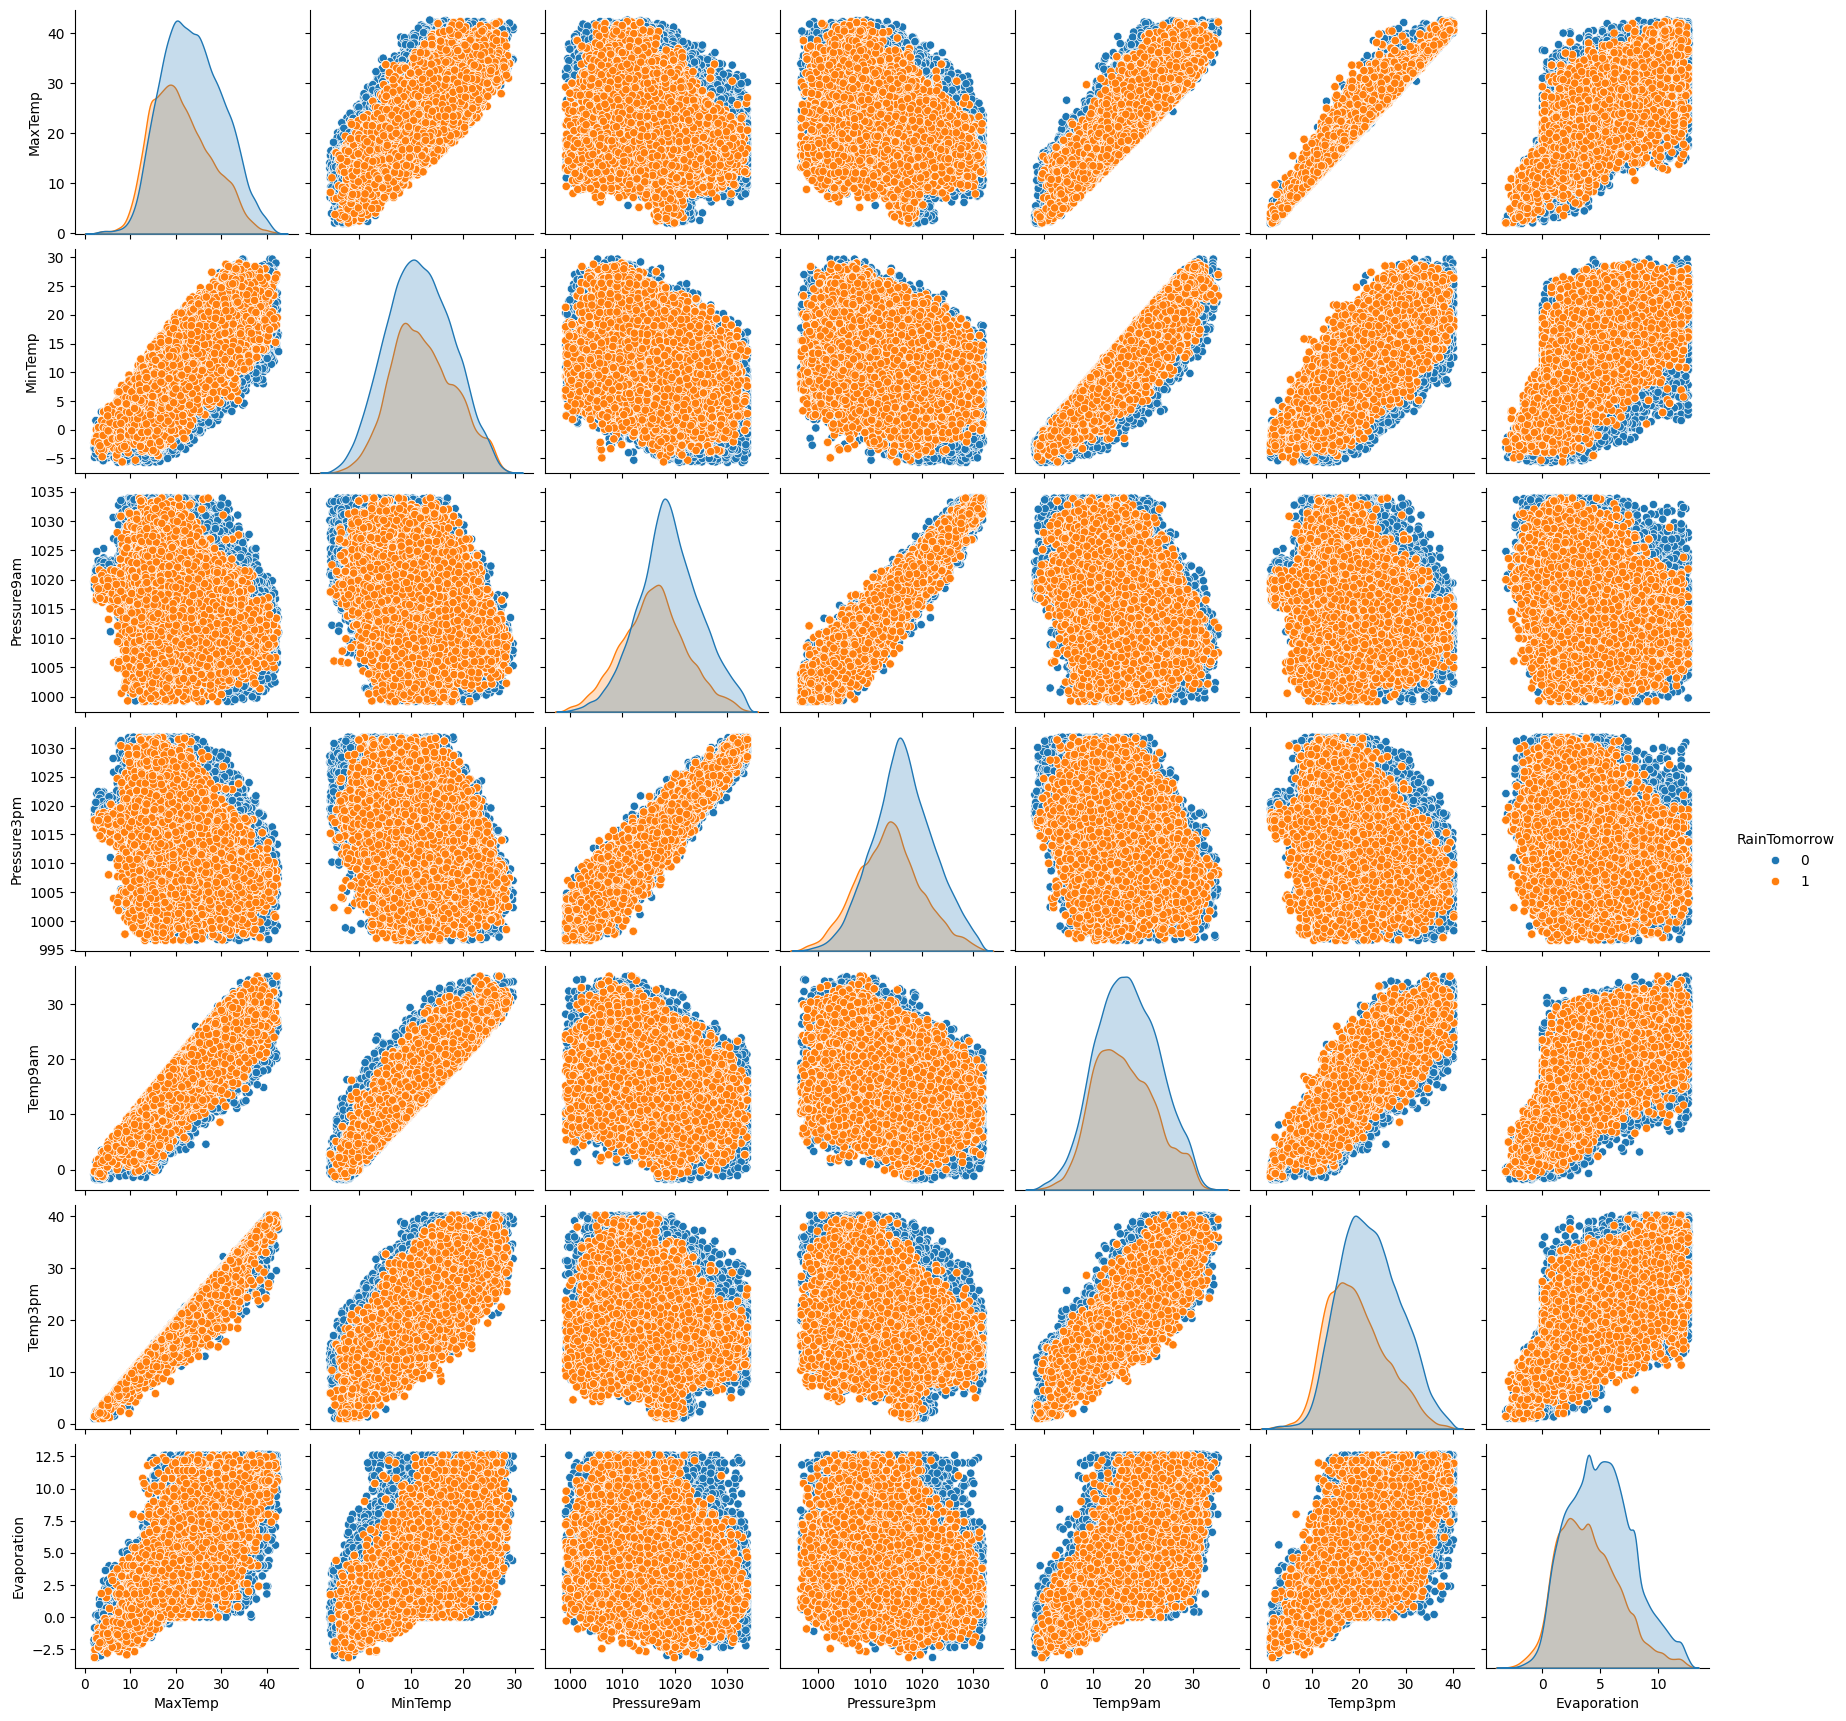

In [24]:
sns.pairplot( data=MiceImputed, vars=('MaxTemp','MinTemp','Pressure9am','Pressure3pm', 'Temp9am', 'Temp3pm', 'Evaporation'), hue='RainTomorrow' )

# **FEATURE SELECTION**

In [27]:
# Standardize Data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit_transform(MiceImputed)
modified_dataset = pd.DataFrame(r_scaler.fit_transform(MiceImputed), index = MiceImputed.index, columns=MiceImputed.columns)
modified_dataset.head()

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustDir  \
0  0.041667  0.539548  0.514778  0.437139     0.583346  0.510850     0.866667   
1  0.041667  0.370056  0.568966  0.374599     0.576573  0.741290     0.933333   
2  0.041667  0.525424  0.583744  0.374599     0.708938  0.786910     1.000000   
3  0.041667  0.420904  0.640394  0.374599     0.596887  0.756887     0.266667   
4  0.041667  0.655367  0.746305  0.478832     0.665889  0.429556     0.866667   

   WindGustSpeed  WindDir9am  WindDir3pm  ...  Cloud9am  Cloud3pm   Temp9am  \
0       0.521127    0.866667    0.933333  ...  0.838456  0.417859  0.506775   
1       0.521127    0.400000    1.000000  ...  0.336387  0.228723  0.514905   
2       0.549296    0.866667    1.000000  ...  0.343298  0.174669  0.617886   
3       0.239437    0.600000    0.000000  ...  0.294080  0.185292  0.539295   
4       0.478873    0.066667    0.466667  ...  0.756327  0.698675  0.531165   

    Temp3pm  RainToday   RISK_MM  RainTomorrow  year  month       day  
0  0.530612   0.249995  0.000000           0.0   0.1    1.0  0.000000  
1  0.594388   0.249995  0.000000           0.0   0.1    1.0  0.033333  
2  0.566327   0.249995  0.000000           0.0   0.1    1.0  0.066667  
3  0.650510   0.249995  0.076923           0.0   0.1    1.0  0.100000  
4  0.732143   0.249995  0.015385           0.0   0.1    1.0  0.133333  

[5 rows x 26 columns]

In [28]:
# Feature importance using Filter method
from sklearn.feature_selection import SelectKBest, chi2
X = modified_dataset.loc[:, modified_dataset.columns != 'RainTomorrow']
y = modified_dataset[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm', 'RainToday',
       'RISK_MM'],
      dtype='object')


In [30]:
# Feature selection by Wrapper Method
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(RandomForestClassifier(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Sunshine', 'Humidity3pm', 'Cloud3pm', 'RISK_MM']
[0.00163243 0.00198108 0.00213486 0.00664109 0.00194937 0.04161249
 0.00125107 0.00681081 0.00120607 0.00134744 0.00094832 0.0013446
 0.00245146 0.04764479 0.00589437 0.0103183  0.0212991  0.06114829
 0.0019734  0.00343862 0.00333322 0.77088339 0.00078559 0.00092265
 0.00104717]


In [33]:
!pip install eli5


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.4/108.4 kB 4.8 MB/s eta 0:00:00


In [34]:
import eli5
from eli5.sklearn import PermutationImportance

p = PermutationImportance(RandomForestClassifier(n_estimators=100, random_state=0).fit(X,y), random_state=1)
p.fit(X,y)
eli5.show_weights(p, feature_names = X.columns.tolist())

# **TRAINING WITH DIFFERENT MODELS**

In [35]:
features = MiceImputed[['Location',
                       'MinTemp',
                       'MaxTemp',
                       'Rainfall',
                       'Evaporation',
                       'Sunshine',
                       'WindGustDir',
                       'WindGustSpeed',
                       'WindDir9am',
                       'WindDir3pm',
                       'WindSpeed9am',
                       'WindSpeed3pm',
                       'Humidity9am',
                       'Humidity3pm',
                       'Pressure9am',
                       'Pressure3pm',
                       'Cloud9am',
                       'Cloud3pm',
                       'Temp9am',
                       'Temp3pm',
                       'RainToday']]
target = MiceImputed['RainTomorrow']

In [36]:
# split into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [37]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [62]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, ConfusionMatrixDisplay, roc_curve, classification_report

def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0


    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)

    plot_roc_cur(fper, tper)
    ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues, normalize='all')
    plt.show()

    return model, accuracy, roc_auc, coh_kap, time_taken

**Model 1: Logistic Regression Classifier**

Accuracy = 0.7854336734693877
ROC Area under Curve = 0.7667475171886937
Cohen's Kappa = 0.5425661265698869
Time taken = 5.196515321731567
              precision    recall  f1-score   support

           0    0.80462   0.85395   0.82855     23800
           1    0.75066   0.67955   0.71334     15400

    accuracy                        0.78543     39200
   macro avg    0.77764   0.76675   0.77094     39200
weighted avg    0.78343   0.78543   0.78329     39200



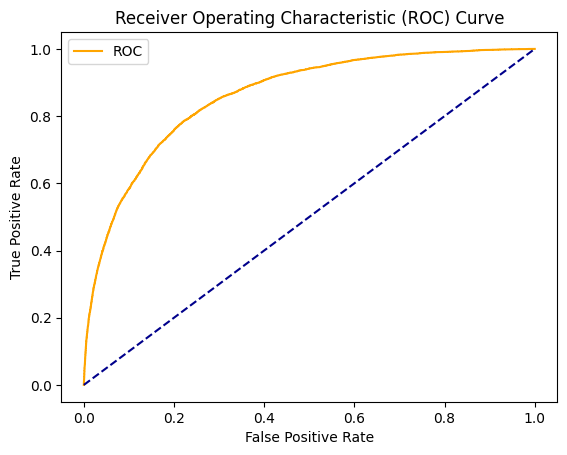

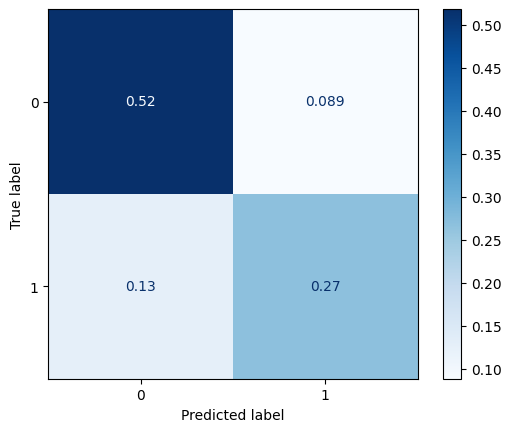

In [63]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

**Model 2: Decision Tree**

Accuracy = 0.8706122448979592
ROC Area under Curve = 0.8705844155844158
Cohen's Kappa = 0.7320917878406012
Time taken = 0.5375535488128662
              precision    recall  f1-score   support

           0    0.91218   0.87071   0.89097     23800
           1    0.81331   0.87045   0.84091     15400

    accuracy                        0.87061     39200
   macro avg    0.86275   0.87058   0.86594     39200
weighted avg    0.87334   0.87061   0.87130     39200



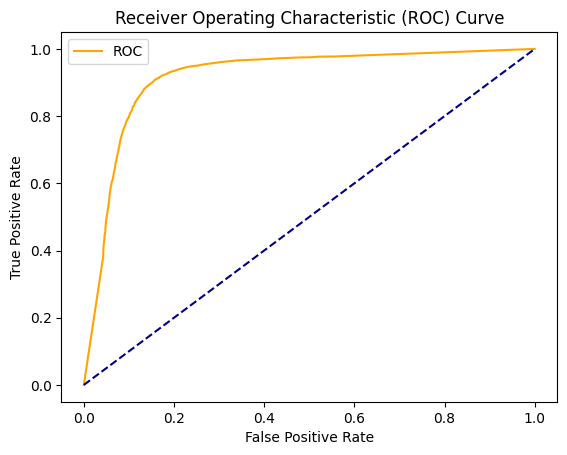

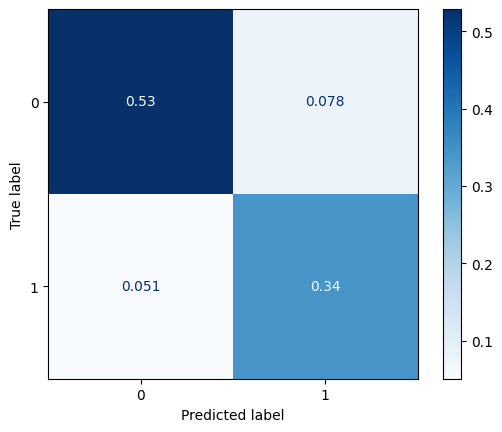

In [64]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

**Model 3: Neural Network(Multilayer Perceptron)**

Accuracy = 0.880765306122449
ROC Area under Curve = 0.8741902215431627
Cohen's Kappa = 0.7496346064079706
Time taken = 402.8475594520569
              precision    recall  f1-score   support

           0    0.89936   0.90487   0.90211     23800
           1    0.85158   0.84351   0.84752     15400

    accuracy                        0.88077     39200
   macro avg    0.87547   0.87419   0.87482     39200
weighted avg    0.88059   0.88077   0.88066     39200



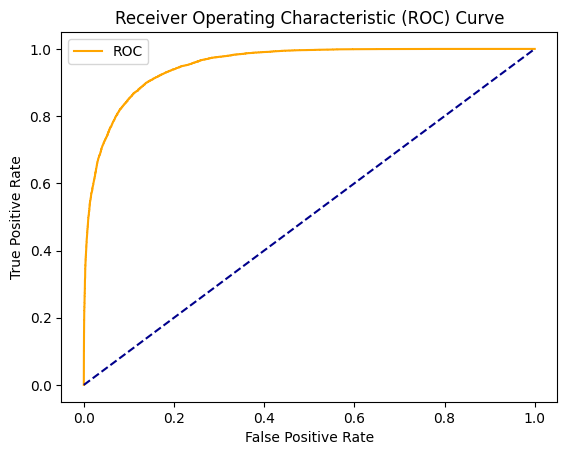

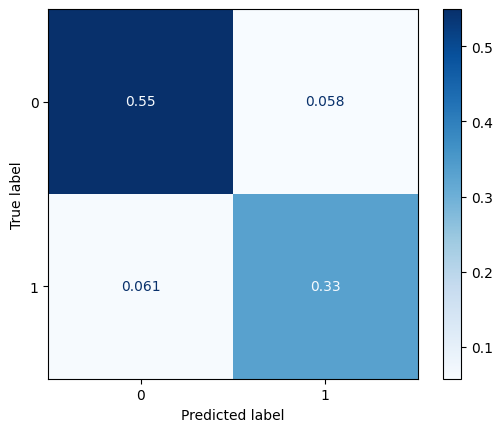

In [65]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 500}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

**Model 4: Random Forest**

Accuracy = 0.9340816326530612
ROC Area under Curve = 0.9344041252864783
Cohen's Kappa = 0.8627773773849714
Time taken = 39.77064085006714
              precision    recall  f1-score   support

           0    0.95744   0.93290   0.94501     23800
           1    0.90025   0.93591   0.91773     15400

    accuracy                        0.93408     39200
   macro avg    0.92884   0.93440   0.93137     39200
weighted avg    0.93497   0.93408   0.93429     39200



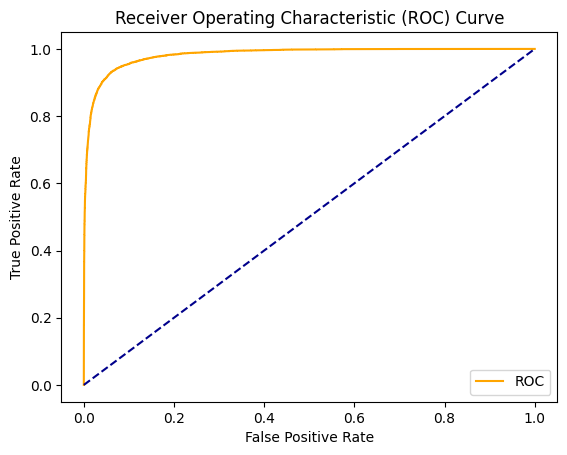

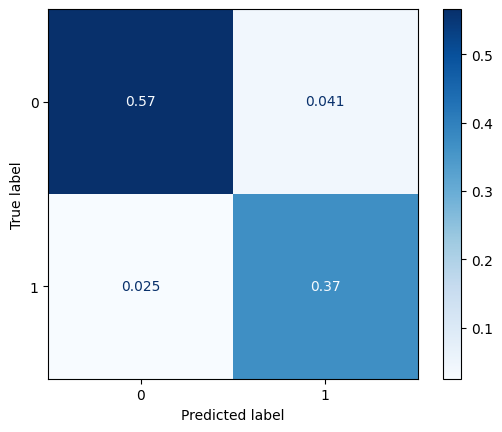

In [66]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 42}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

**Model 5: LightGBM**

[LightGBM] [Info] Number of positive: 45773, number of negative: 71826
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4306
[LightGBM] [Info] Number of data points in the train set: 117599, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.389230 -> initscore=-0.450552
[LightGBM] [Info] Start training from score -0.450552
Accuracy = 0.8785204081632653
ROC Area under Curve = 0.8726508785332314
Cohen's Kappa = 0.7453359206686326
Time taken = 7.906399965286255
              precision    recall  f1-score   support

           0    0.89989   0.90004   0.89997     23800
           1    0.84548   0.84526   0.84537     15400

    accuracy                        0.87852     39200
   macro avg    0.87269   0.87265   0.87267     39200
weighted avg    0.87851   0.87852   0.87852     39200



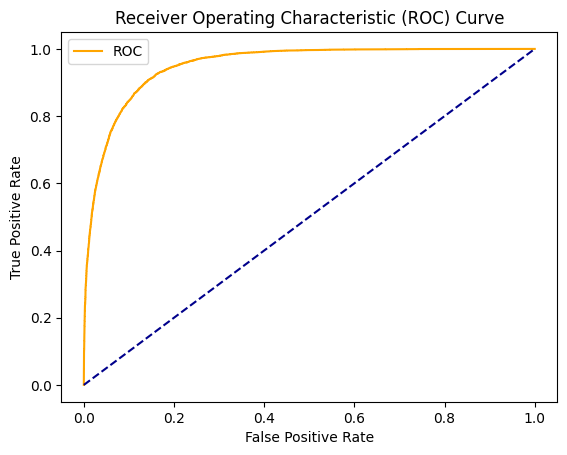

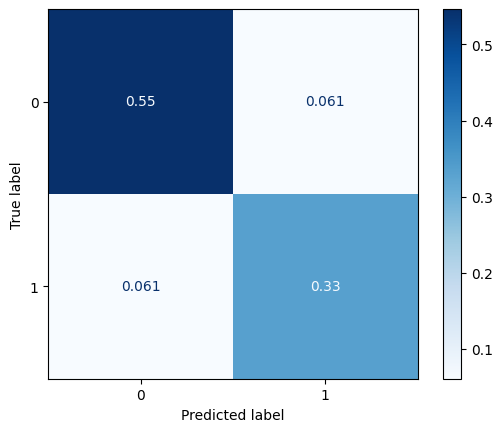

In [67]:
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95,
         'max_depth': 16,
         'min_split_gain': 0.1,
         'n_estimators': 200,
         'num_leaves': 50,
         'reg_alpha': 1.2,
         'reg_lambda': 1.2,
         'subsample': 0.95,
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model(model_lgb, X_train, y_train, X_test, y_test)

In [68]:
#!pip install catboost

**Model 6: CatBoost**

Accuracy = 0.9493877551020408
ROC Area under Curve = 0.9526699770817418
Cohen's Kappa = 0.8951033633692607
Time taken = 314.919935464859
              precision    recall  f1-score   support

           0    0.97838   0.93735   0.95743     23800
           1    0.90907   0.96799   0.93761     15400

    accuracy                        0.94939     39200
   macro avg    0.94373   0.95267   0.94752     39200
weighted avg    0.95115   0.94939   0.94964     39200



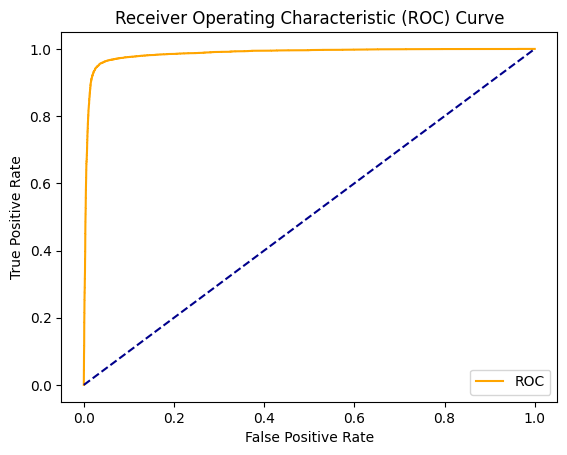

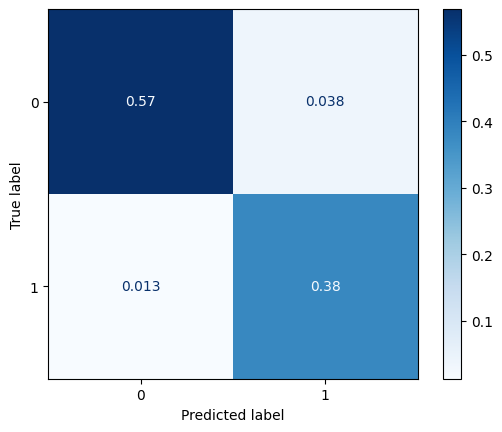

In [69]:
import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model(model_cb, X_train, y_train, X_test, y_test, verbose=False)

**Model 7: XGBoost**

Accuracy = 0.9620663265306122
ROC Area under Curve = 0.9636611917494271
Cohen's Kappa = 0.9210215826792265
Time taken = 56.81823778152466
              precision    recall  f1-score   support

           0    0.98082   0.95622   0.96836     23800
           1    0.93486   0.97110   0.95264     15400

    accuracy                        0.96207     39200
   macro avg    0.95784   0.96366   0.96050     39200
weighted avg    0.96277   0.96207   0.96219     39200



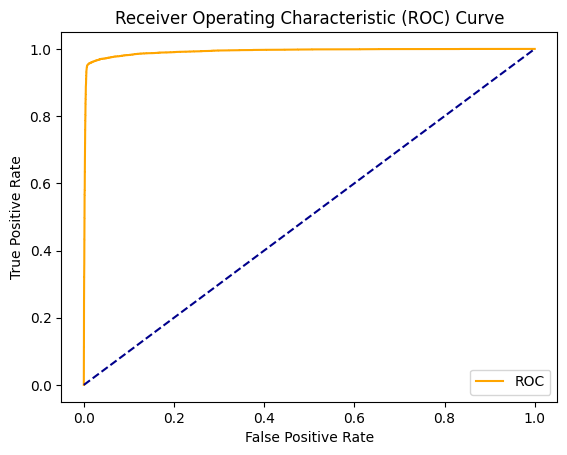

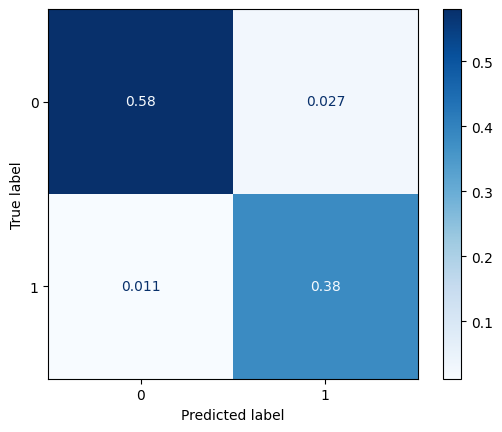

In [70]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

# **MODEL COMPARISON**

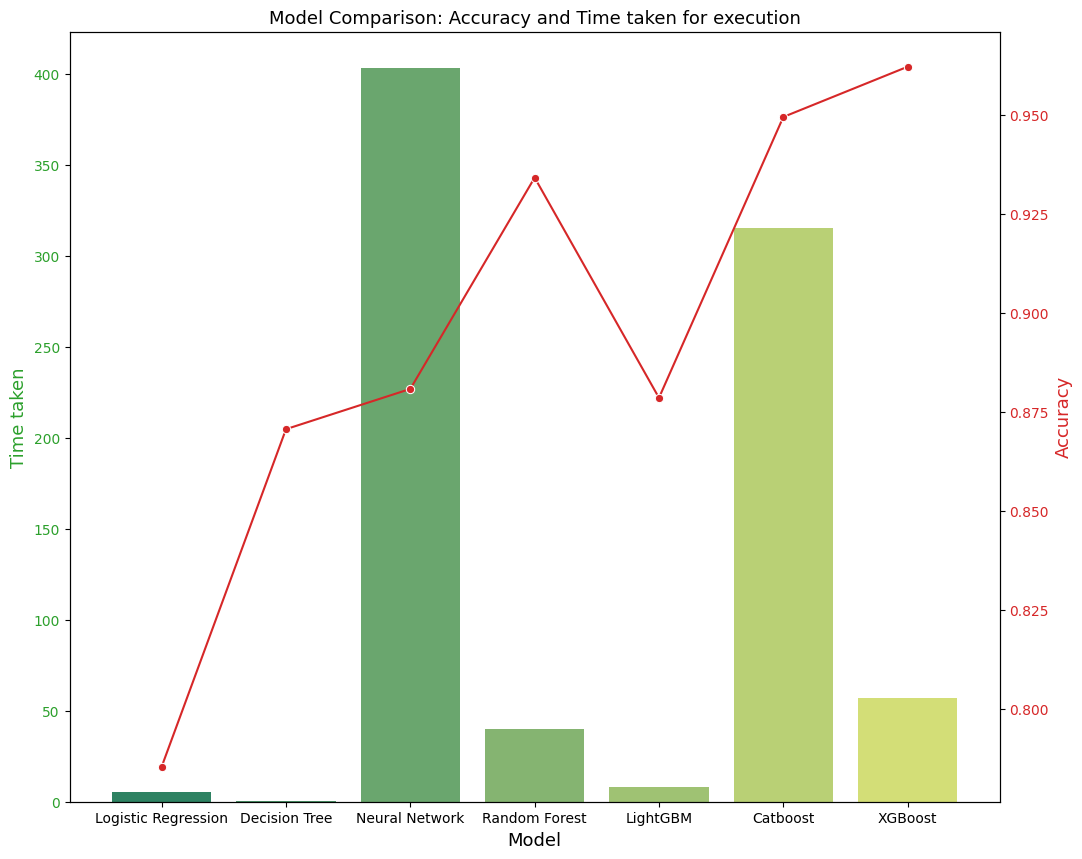

In [75]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_nn, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_nn, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_nn, tt_rf, tt_lgb, tt_cb, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Neural Network','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)

# --- Plot time taken (bar plot) ---
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
sns.barplot(x='Model', y='Time taken', data=data, palette='summer', ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)

# --- Create twin axis for accuracy ---
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
sns.lineplot(x='Model', y='Accuracy', data=data, marker='o', color=color, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)

plt.show()

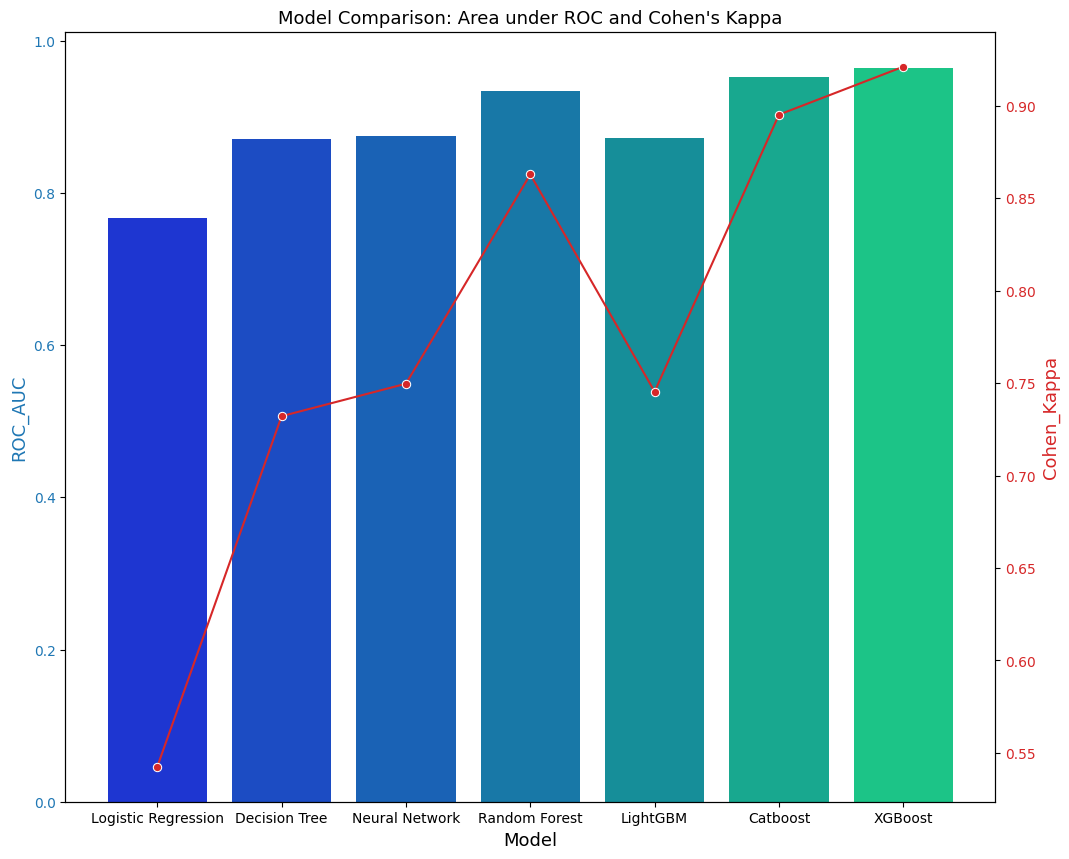

In [72]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohen\'s Kappa', fontsize=13)

# --- Bar plot for ROC_AUC ---
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
sns.barplot(x='Model', y='ROC_AUC', data=data, palette='winter', ax=ax3)
ax3.tick_params(axis='y', labelcolor=color)

# --- Create twin axis for Cohen's Kappa ---
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
sns.lineplot(x='Model', y='Cohen_Kappa', data=data, marker='o', color=color, ax=ax4)
ax4.tick_params(axis='y', labelcolor=color)

plt.show()
